## import libraries

In [85]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output="pandas")
from preprocessing_93 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage,  fcluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


warnings.simplefilter('ignore')
RSEED = 5

## Preprocessing

In [86]:
#load pipline and apply to data frame 

In [87]:
#df = pd.read_csv("data/AQUASTAT_complete.csv")
df = pd.read_csv("/media/ml/Mass/Data/Final_Project_Water_Management/data/AQUASTAT_complete.csv")


In [88]:
pre_split_processor = get_pre_split_processor_93()
df_pre = pre_split_processor.fit_transform(df)

In [89]:
df_pre = df_pre.query("year > 1992")

In [90]:
full_preprocessor = get_full_preprocessor_93(df_pre.columns.to_list(), hot=False)

df_pro = full_preprocessor.fit_transform(df_pre)

In [91]:
df_pro.head()

,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,groundwater_accounted_inflow,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,country,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water
29,0.42963,-0.106528,1.105174,1.001781,1.317100,2.337318,0.734579,0.251313,0.084084,-0.087237,...,-0.096457,0.973941,1.605272,-0.264962,-0.202617,Afghanistan,1993,179.839036,61.906480,21.4
30,0.42963,-0.121301,1.096506,0.993103,1.315969,2.639310,0.726701,0.243083,0.084084,-0.087237,...,-0.136904,0.962895,1.462471,-0.220348,-0.202617,Afghanistan,1994,100.444869,60.475171,21.4
31,0.42963,-0.128683,1.087626,0.984213,1.314784,2.473168,0.722750,0.236760,0.084084,-0.087237,...,-0.226799,0.951585,1.347776,-0.183809,-0.202617,Afghanistan,1995,152.221868,59.043863,21.5
32,0.42963,-0.128807,1.078526,0.975102,1.313539,2.411257,0.722684,0.232441,0.084084,-0.087237,...,-0.189200,0.939998,1.260279,-0.155988,-0.202617,Afghanistan,1996,141.607370,57.612555,23.3
33,0.42963,-0.124127,1.069192,0.965757,1.312230,2.368001,0.725190,0.229608,0.084084,-0.087237,...,-0.203122,0.928119,1.191977,-0.134623,-0.202617,Afghanistan,1997,151.085927,56.181246,25.0


## Label encoding Country


In [92]:
#create a list of codes per country 
label_encoder = LabelEncoder()
label_encoder.fit(df_pro['country'])

df_pro['country_encoded'] = label_encoder.transform(df_pro['country'])

country_code = dict(zip(label_encoder.transform(df_pro['country']), df_pro['country']))

df_country = pd.DataFrame(list(country_code.items()), columns=['Code', 'Country'])
print(df_country)


     Code                             Country
0       0                         Afghanistan
1       1                             Albania
2       2                             Algeria
3       3                              Angola
4       4                           Argentina
..    ...                                 ...
156   156  Venezuela (Bolivarian Republic of)
157   157                            Viet Nam
158   158                               Yemen
159   159                              Zambia
160   160                            Zimbabwe

[161 rows x 2 columns]


In [93]:
#create a data frame for each decade
df_90 = df_pro[df_pro['year'] < 2001]
df_00 = df_pro[df_pro['year'].between(2001,2010)]
df_10 = df_pro[df_pro['year'].between(2011,2020)]

In [94]:
df_90['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000])

In [95]:
#group the data by country (reduces the columns to one per country)
df_pro_com = df_pro.groupby('country').mean().reset_index()
df_90_com = df_90.groupby('country').mean().reset_index()
df_00_com = df_00.groupby('country').mean().reset_index()
df_10_com = df_10.groupby('country').mean().reset_index()


df_pro_com.head(10)

,country,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water,country_encoded
0,Afghanistan,0.429630,-0.112936,1.064577,0.961136,1.302179,1.629894,0.731157,0.197706,0.084084,...,-0.361997,0.923657,0.825113,0.099912,-0.202617,2006.5,339.557140,55.522527,40.703571,0.0
1,Albania,0.429630,0.647816,-0.169636,0.007421,-0.048517,0.956919,-0.512250,0.504118,-0.505430,...,0.370841,-0.402242,0.118463,-0.750315,-0.257835,2006.5,2882.937682,7.673583,95.632143,1.0
2,Algeria,0.429630,-1.090292,0.503603,1.028990,0.110733,0.017425,0.758367,0.297528,-0.748162,...,-1.412399,0.423175,-0.470469,0.910222,-0.268523,2006.5,3243.014455,99.424548,87.178571,2.0
3,Angola,-2.835104,-1.126102,-0.668594,-1.073887,-0.952153,-0.258967,0.394532,0.357423,-0.858488,...,0.205165,-0.695563,-1.521227,0.507738,-0.268597,2006.5,2429.465346,1.777295,46.982143,3.0
4,Argentina,0.429630,-0.120600,1.142951,0.090925,0.496920,-0.419239,1.468326,0.602085,1.341370,...,0.792510,1.157768,0.908125,1.200286,1.897976,2006.5,9246.514458,9.423177,97.392857,4.0
5,Armenia,0.429630,0.224779,0.170328,0.843906,0.346690,0.799090,-0.681920,0.389831,-0.479390,...,-0.341164,-0.061224,0.908883,-0.581305,-0.266704,2006.5,2350.615983,51.587942,95.928571,5.0
6,Australia,0.429630,-1.123184,0.862321,0.020865,0.217889,-0.956458,1.332684,0.613758,-0.867417,...,0.820100,0.863678,0.928911,0.777095,-0.270081,2006.5,41327.314780,6.834146,100.000000,6.0
7,Austria,0.429630,0.248058,-0.922747,-1.091898,-1.760581,-1.282439,-0.139384,0.326169,0.100394,...,0.332652,0.088941,0.135614,-0.009797,-0.185844,2006.5,38982.954817,9.770536,100.000000,7.0
8,Azerbaijan,0.429630,0.656138,0.758097,0.885759,0.505194,0.062457,0.058946,0.569797,1.670031,...,-0.119521,0.670304,1.539056,-0.044975,-0.171520,2006.5,3192.247917,52.866290,79.328571,8.0
9,Bahrain,0.429630,-0.658609,-0.724891,1.483934,-0.522457,-1.774063,-3.066628,-2.743422,2.331077,...,-1.957979,-0.973210,0.068378,-1.084002,-0.269666,2006.5,18066.502388,184.610115,99.082143,9.0


In [96]:
#drop unnecessary columns 
df_90_com.drop(['year', 'country'], axis=1, inplace=True)
df_00_com.drop(['year', 'country'], axis=1, inplace=True)
df_10_com.drop(['year', 'country'], axis=1, inplace=True)
df_pro_com.drop(['year', 'country'], axis=1, inplace=True)

## optimal number of Clusters & reduce dimensionality

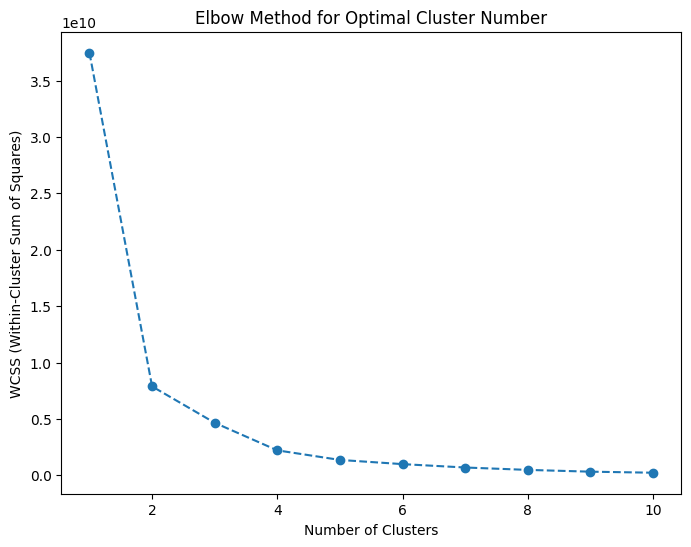

In [97]:
# Elbow method to find optimal number 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pro_com)  # Use your original data, not TF-IDF
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

In [98]:
#TSNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0, init="random", perplexity=20, learning_rate=100)
tsne_result = tsne.fit_transform(df_pro_com)  

## K-mean results

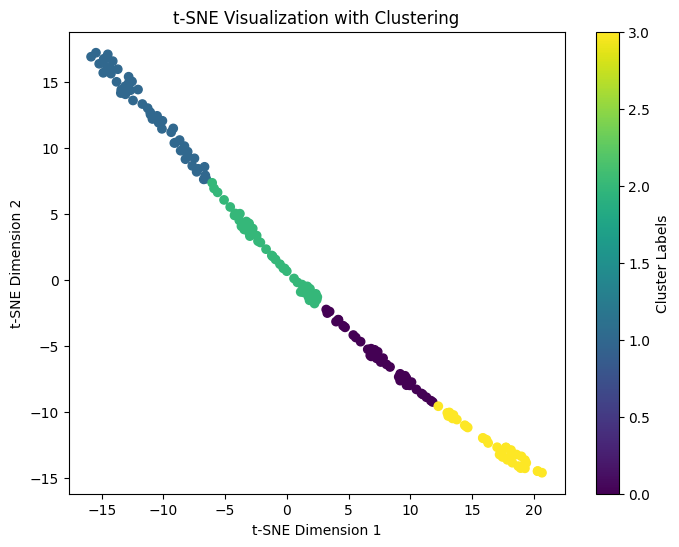

In [99]:
#use K-mean model to cluster and visualize results 
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
cluster_labels = kmeans.fit_predict(tsne_result)

# Visualize the t-SNE results with cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result['tsne0'],tsne_result['tsne1'], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization with Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(scatter, label='Cluster Labels')
plt.show()

## Cluster 2010 till 2020

In [100]:
#apply TSNE for data of last decade 
tsne = TSNE(n_components=2, random_state=0, init="random", perplexity=20, learning_rate=100)
tsne_df_10 = tsne.fit_transform(df_10_com)  

## Final used model 


In [112]:
# Use k_optimal as the number of clusters
for cluster_id in range(k_optimal):  
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_countries = df_pro_com.index[cluster_indices]
    
    print(f"Cluster {cluster_id} (Size: {len(cluster_countries)}):")
    for country_code in cluster_countries:
        # Access the country name based on the country code in your DataFrame
        matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
        if not matching_rows.empty:
            country_name = matching_rows.values[0]
            print(f"- {country_name} (Country Code: {country_code})")
        else:
            print(f"- No match found for Country Code: {country_code}")

Cluster 0 (Size: 36):
- Argentina (Country Code: 4)
- Barbados (Country Code: 11)
- Botswana (Country Code: 18)
- Brazil (Country Code: 19)
- Bulgaria (Country Code: 20)
- Chile (Country Code: 29)
- Colombia (Country Code: 31)
- Costa Rica (Country Code: 34)
- Croatia (Country Code: 35)
- Cuba (Country Code: 36)
- Czechia (Country Code: 38)
- Dominican Republic (Country Code: 43)
- Estonia (Country Code: 48)
- Gabon (Country Code: 54)
- Hungary (Country Code: 66)
- Iran (Islamic Republic of) (Country Code: 70)
- Kazakhstan (Country Code: 78)
- Latvia (Country Code: 83)
- Lebanon (Country Code: 84)
- Libya (Country Code: 87)
- Lithuania (Country Code: 88)
- Malaysia (Country Code: 92)
- Mauritius (Country Code: 96)
- Mexico (Country Code: 97)
- Oman (Country Code: 111)
- Panama (Country Code: 114)
- Poland (Country Code: 118)
- Romania (Country Code: 124)
- Russian Federation (Country Code: 125)
- Slovakia (Country Code: 130)
- South Africa (Country Code: 133)
- Suriname (Country Code: 

## other models were tested , the best results were found with the above model 

In [102]:
# df_h_last_10 = pd.read_csv('data/heir_last_10.csv', encoding='ISO-8859-1')


In [103]:
#df_h

### Agglomerative hierarchical clustering

In [104]:
# linked = linkage(df_pro_com, method='ward', metric='euclidean')

# # Specify a threshold or number of clusters
# desired_num_clusters = 4
# # Get the cluster assignments
# cluster_labels = fcluster(linked, t=desired_num_clusters, criterion='maxclust')

# for cluster_id in range(1, desired_num_clusters + 1):
#     cluster_indices = np.where(cluster_labels == cluster_id)[0]
#     print(f"Cluster {cluster_id} (Size: {len(cluster_indices)}):")
#     for country_code in df_pro_com.index[cluster_indices]:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows.empty:
#             country_name = matching_rows.values[0]
#             print(f"- {country_name} (Country Code: {country_code})")
#         else:
#             print(f"- No match found for Country Code: {country_code}")


In [105]:
# # Cluster with TSNE
# linked = linkage(tsne_result, method='ward', metric='euclidean')

# # Specify a threshold or number of clusters
# desired_num_clusters = 4
# # Get the cluster assignments
# cluster_labels = fcluster(linked, t=desired_num_clusters, criterion='maxclust')

# for cluster_id in range(1, desired_num_clusters + 1):
#     cluster_indices = np.where(cluster_labels == cluster_id)[0]
#     print(f"Cluster {cluster_id} (Size: {len(cluster_indices)}):")
#     for country_code in df_pro_com.index[cluster_indices]:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows.empty:
#             country_name = matching_rows.values[0]
#             print(f"- {country_name} (Country Code: {country_code})")
#         else:
#             print(f"- No match found for Country Code: {country_code}")




In [106]:
# import csv

# cluster_info = []

# # Iterate through the clusters
# for cluster_id in range(1, desired_num_clusters + 1):
#     cluster_indices = np.where(cluster_labels == cluster_id)[0]
#     cluster_data = []
#     for country_code in df_pro_com.index[cluster_indices]:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows.empty:
#             country_name = matching_rows.values[0]
#             # Append the information to the cluster_data list
#             cluster_data.append({"Country Name": country_name})

#     # Append the cluster_data list to the cluster_info list
#     cluster_info.append({"Cluster": cluster_id, "Size": len(cluster_indices), "Countries": cluster_data})

# # Export the cluster information to a CSV file
# csv_file = "1993_hierarchical_clustering.csv"
# with open(csv_file, mode='w', newline='') as file:
#     fieldnames = ["Cluster", "Size", "Countries"]
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()
#     for cluster in cluster_info:
#         writer.writerow(cluster)

# print(f"Cluster information exported to '{csv_file}'.")

In [107]:
# cluster_info = []

# # Iterate through the clusters
# for cluster_id in range(1, desired_num_clusters + 1):
#     cluster_indices = np.where(cluster_labels == cluster_id)[0]
#     cluster_data = []
#     for country_code in df_pro_com.index[cluster_indices]:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows.empty:
#             country_name = matching_rows.values[0]
#             # Use pycountry to get the country code
#             try:
#                 country_info = pycountry.countries.search_fuzzy(country_name)
#                 if country_info:
#                     country_code_alpha2 = country_info[0].alpha_2
#                 else:
#                     country_code_alpha2 = "N/A"
#             except LookupError:
#                 country_code_alpha2 = "N/A"
#             # Append the information to the cluster_data list
#             cluster_data.append({"Country Name": country_name, "Country Code": country_code_alpha2})

#     # Append the cluster_data list to the cluster_info list
#     cluster_info.append({"Cluster": cluster_id, "Size": len(cluster_indices), "Countries": cluster_data})

# # Export the cluster information to a CSV file with separate columns for Country Name and Country Code
# csv_file = "hier_full.csv"
# with open(csv_file, mode='w', newline='') as file:
#     fieldnames = ["Cluster", "Size", "Country Name", "Country Code"]
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()
#     for cluster in cluster_info:
#         for data in cluster["Countries"]:
#             writer.writerow({"Cluster": cluster["Cluster"], "Size": cluster["Size"], "Country Name": data["Country Name"], "Country Code": data["Country Code"]})

# print(f"Cluster information exported to '{csv_file}' with separate columns for Country Name and Country Code.")

In [108]:

# cluster_info = []

# # Iterate through the clusters
# for cluster_id in range(1, desired_num_clusters + 1):
#     cluster_indices = np.where(cluster_labels == cluster_id)[0]
#     cluster_data = []
#     for country_code in df_pro_com.index[cluster_indices]:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows.empty:
#             country_name = matching_rows.values[0]
#             # Use pycountry to get the country code
#             try:
#                 country_info = pycountry.countries.search_fuzzy(country_name)
#                 if country_info:
#                     iso_alpha3_code = country_info[0].alpha_3
#                 else:
#                     iso_alpha3_code = "N/A"
#             except LookupError:
#                 iso_alpha3_code = "N/A"
#             # Append the information to the cluster_data list
#             cluster_data.append({"Country Name": country_name, "ISO Alpha-3 Code": iso_alpha3_code})

#     # Append the cluster_data list to the cluster_info list
#     cluster_info.append({"Cluster": cluster_id, "Size": len(cluster_indices), "Countries": cluster_data})

# # Specify the path and filename for the CSV file
# csv_file = "heir_last_10.csv"

# # Export the cluster information to a CSV file with separate columns for Country Name and ISO Alpha-3 Code
# with open(csv_file, mode='w', newline='') as file:
#     fieldnames = ["Cluster", "Size", "Country Name", "ISO Alpha-3 Code"]
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()
#     for cluster in cluster_info:
#         for data in cluster["Countries"]:
#             writer.writerow({"Cluster": cluster["Cluster"], "Size": cluster["Size"], "Country Name": data["Country Name"], "ISO Alpha-3 Code": data["ISO Alpha-3 Code"]})

# print(f"Cluster information exported to '{csv_file}' with separate columns for Country Name and ISO Alpha-3 Code.")

### TSNE , 3D model

In [109]:
# # Using TSNE to create a 3 component to allow 3d modelling 
# k_optimal = 4

# tsne_3d = TSNE(n_components=3, random_state=0, init="random", perplexity=20, learning_rate=100)
# tsne_result_3d = tsne_3d.fit_transform(df_pro_com)  

# # You can now visualize the t-SNE results with the chosen number of clusters (k_optimal)
# # For example, you can use KMeans with k_optimal clusters to cluster the t-SNE results and then plot the clusters.
# kmeans_3d = KMeans(n_clusters=k_optimal, random_state=0)
# cluster_labels_3d = kmeans_3d.fit_predict(tsne_result_3d)



In [110]:
# for cluster_id in range(k_optimal):  # Use k_optimal as the number of clusters
#     cluster_indices = np.where(cluster_labels_3d == cluster_id)[0]
#     cluster_countries = df_pro_com.index[cluster_indices]
    
#     print(f"Cluster {cluster_id} (Size: {len(cluster_countries)}):")
#     for country_code in cluster_countries:
#         # Access the country name based on the country code in your DataFrame
#         matching_rows = df_country.loc[df_country['Code'] == country_code, 'Country']
#         if not matching_rows empty:
#             country_name = matching_rows.values[0]
#             print(f"- {country_name} (Country Code: {country_code})")
#         else:
#             print(f"- No match found for Country Code: {country_code}")

In [111]:

# Create a 3D scatter plot for each cluster

# for cluster_id in range(k_optimal):
#     cluster_indices = np.where(cluster_labels_3d == cluster_id)[0]

#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111, projection='3d')

#     ax.scatter(tsne_result_3d['tsne0'],tsne_result_3d['tsne1'],tsne_result_3d['tsne2'], label=f'Cluster {cluster_id}', c=f'C{cluster_id}')

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title(f'3D Scatter Plot of Cluster {cluster_id}')

#     ax.legend()

#     plt.show()


# for cluster_id in range(k_optimal):
#     cluster_indices = np.where(cluster_labels_3d == cluster_id)[0]

#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111, projection='3d')

#     # Filter the data points belonging to the current cluster
#     cluster_data = tsne_result_3d[cluster_indices]

#     ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster_id}', c=f'C{cluster_id}')

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title(f'3D Scatter Plot of Cluster {cluster_id}')

#     ax.legend()

#     plt.show()
